***Basic Checklist :***

**Form Analysis :**

Target variable :

Rows and columns : 

Types of variables : 

Missing values analysis :

**Content Analysis :**

Visualization of the target : 


Meaning of the variables :Relationship between variables and target :

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
pd.set_option('display.max_row',7613)
pd.set_option('display.max_column',5)

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S
3,4,1,...,C123,S
4,5,0,...,NaN,S


**form analysis**

In [5]:
df = data.copy()

In [6]:
df.shape

(891, 12)

In [7]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

<Axes: >

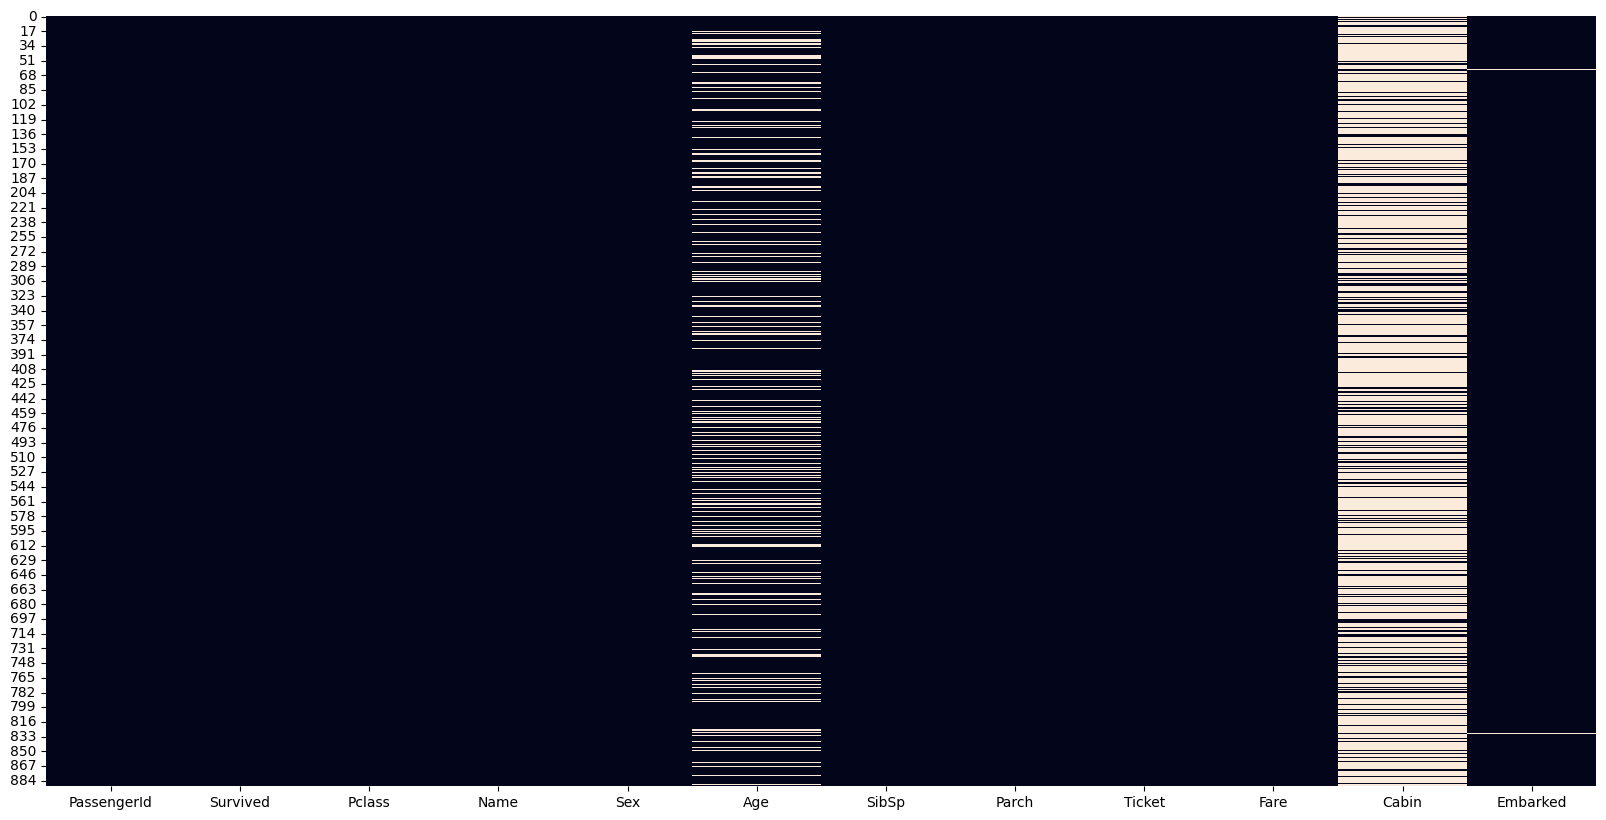

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [9]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

Content Analysis :
add Codeadd Markdown
Eleminate useless columns